# Logistic Regression

### logistic regression을 tensorflow로 구현하여 1d 데이터의 분류를 해보고자 한다.

In [5]:
##tenssorflow==2.3 환경에서 구현  
import tensorflow as tf
import numpy as np
# weigh와 bias 변수 설정
w = tf.Variable(tf.random.uniform([1,1]))
b = tf.Variable(tf.random.uniform([1]))
#10보다 작은 값은 0, 큰 값은 1인 데이터
label_x=np.array([[2],[3],[4],[6],[8],[11],[13],[14],[15]],dtype=np.float32) #input data
label_y=np.array([[0],[0],[0],[0],[0],[1],[1],[1],[1]],dtype=np.float32) #output data 

In [6]:
#loss function 정의
def loss_function():
#sigmoid function으로 pred_y값을 도출하고 cross entropy loss를 loss function으로 loss 값도출
  z= tf.matmul(label_x,w)+b
  pred_y = tf.sigmoid(z)
  cost = -tf.reduce_mean(label_y * tf.math.log(pred_y) + (1 - label_y) * tf.math.log(1 - pred_y))#cross entropy loss를 loss function으로 활용
  return cost
optimizer = tf.optimizers.Adam(learning_rate=0.01) #보편적으로 가장 많이 사용하는 adam optimizer 활용

for step in range(10000): #train
    cost_val=optimizer.minimize(loss_function, var_list=[w,b])
    if step % 100 == 0:
        print(step,"loss_value:", loss_function().numpy(), 'weight:', w.numpy()[0], 'bias:', b.numpy()[0])

0 loss_value: 2.2939072 weight: [0.7964869] bias: 0.42176628
100 loss_value: 0.5561955 weight: [0.09693141] bias: -0.3960538
200 loss_value: 0.46829975 weight: [0.15856151] bias: -0.8903931
300 loss_value: 0.3926319 weight: [0.20990206] bias: -1.411483
400 loss_value: 0.33229226 weight: [0.25961727] bias: -1.9122263
500 loss_value: 0.2854466 weight: [0.30629107] bias: -2.380283
600 loss_value: 0.24901465 weight: [0.3497142] bias: -2.8146822
700 loss_value: 0.22029704 weight: [0.39013186] bias: -3.2184527
800 loss_value: 0.19726034 weight: [0.42792308] bias: -3.5956388
900 loss_value: 0.1784454 weight: [0.46347058] bias: -3.9501603
1000 loss_value: 0.16281551 weight: [0.4971168] bias: -4.285464
1100 loss_value: 0.14962953 weight: [0.5291539] bias: -4.6044664
1200 loss_value: 0.1383507 weight: [0.5598275] bias: -4.909607
1300 loss_value: 0.12858436 weight: [0.5893413] bias: -5.202912
1400 loss_value: 0.12003562 weight: [0.61786604] bias: -5.486072
1500 loss_value: 0.11248047 weight: [0.6

In [7]:
#최종 train accuracy 측정
pred_y = tf.sigmoid(tf.matmul(label_x,w)+b)
pred_final = tf.cast(pred_y > 0.5,dtype=tf.float32) #0,1로 구성된 모델이 예측한 데이터
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred_final,label_y),dtype=tf.float32))
print("accuracy:", accuracy.numpy())

accuracy: 1.0


## predict

In [8]:
#test data 설정 및 학습한 모델로 predict
test_x=np.array([[1],[16]],dtype=np.float32) 
test_y=np.array([[0],[1]],dtype=np.float32)

test_pred= tf.sigmoid(tf.matmul(test_x,w)+b)
test_pred_final= tf.cast(test_pred > 0.5,dtype=tf.float32) #0,1로 구성된 모델이 예측한 데이터
test_accuracy = tf.reduce_mean(tf.cast(tf.equal(test_pred_final,test_y),dtype=tf.float32)) #test_accuracy
print("accuracy:", test_accuracy.numpy())

accuracy: 1.0


## plot result

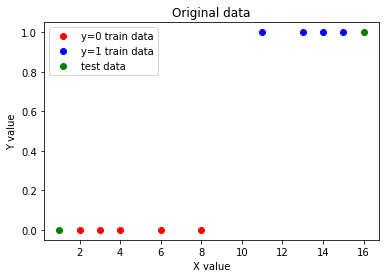

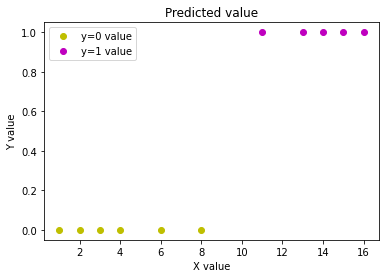

In [10]:
import matplotlib.pyplot as plt
test_pred_final=np.array(test_pred_final)
pred_final=np.array(pred_final)

#시각화를 위해 label y가 0인 데이터와 1인 데이터를 분리한 후, 결과 plot
label_x_0=label_x[label_y==0] 
label_x_1=label_x[label_y==1]
label_y_0=label_y[label_y==0] 
label_y_1=label_y[label_y==1]
# original data plot
plt.title("Original data")
plt.xlabel("X value")
plt.ylabel("Y value")
plt.plot(label_x_0, label_y_0, 'ro', label='y=0 train data')
plt.plot(label_x_1, label_y_1,'bo', label='y=1 train data')
plt.plot(test_x, test_y,'go', label='test data')
plt.legend()
plt.show()

pred_final_0=pred_final[pred_final==0]
pred_final_1=pred_final[pred_final==1]


test_pred_x_0=test_x[test_pred_final==0]
test_pred_x_1=test_x[test_pred_final==1]
test_pred_final_0=test_pred_final[test_pred_final==0]
test_pred_final_1=test_pred_final[test_pred_final==1]
# preidicted value plot
plt.title("Predicted value")
plt.xlabel("X value")
plt.ylabel("Y value")
plt.plot(label_x_0, pred_final_0, 'yo', label='y=0 value')
plt.plot(label_x_1, pred_final_1,'mo', label='y=1 value')
plt.plot(test_pred_x_0, test_pred_final_0,'yo')
plt.plot(test_pred_x_1, test_pred_final_1,'mo')
plt.legend()
plt.show()